In [1]:
# Importing Neccessary packages
import time
from datetime import date, timedelta, datetime
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
store_data = pd.read_csv("store.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submission_data = pd.read_csv("sample_submission.csv")

C:\Users\Suraj\AppData\Local\Temp\ipykernel_33664\2851375358.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("train.csv")


In [10]:
store_data.info()
train_data.info()
test_data.info()
submission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
-

# Checking if there is Null values in Test and Train dataset

In [11]:
data.find_null_values(train_data), data.find_null_values(test_data)

(Store            0
 DayOfWeek        0
 Date             0
 Sales            0
 Customers        0
 Open             0
 Promo            0
 StateHoliday     0
 SchoolHoliday    0
 dtype: int64,
 Id                0
 Store             0
 DayOfWeek         0
 Date              0
 Open             11
 Promo             0
 StateHoliday      0
 SchoolHoliday     0
 dtype: int64)

# Checking the Date limits for Test and Train Dataset

In [15]:
data.get_start_end_date(test_data, 'Date')

('2015-08-01', '2015-09-17')

In [17]:
data.get_start_end_date(train_data, 'Date')

('2013-01-01', '2015-07-31')

In [18]:
# Joining Train and Store datasets
shape, combined_train_store_data = data.join_dataset(train_data, store_data)
print(f" Shape of Combined dataset: {shape}")
combined_train_store_data.head(4)

 Shape of Combined dataset: (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN


In [19]:
# Train and Store dataset
combined_train_store_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0


# Checking for promotions distribution in both train and test sets

In [21]:

# sns.barplot(y = train_data['Store'], x = train_data['Promo'])
# plt.title = "Promo Distribution on train dataset"
# plt.show()

# sns.barplot(y = test_data['Id'], x = test_data['Promo'])
# plt.title = "Promo Distribution on test dataset"
# plt.show()
print("Stastics of Train dataset")
print("[count, mean, std, min, 25%, 50%, 75%, max]")
print(train_data['Promo'].describe().to_list())
print("Stastics of Test dataset")
print("[count, mean, std, min, 25%, 50%, 75%, max]")
print(test_data['Promo'].describe().to_list())

Stastics of Train dataset
[count, mean, std, min, 25%, 50%, 75%, max]
[1017209.0, 0.3815145166824124, 0.4857586048745671, 0.0, 0.0, 0.0, 1.0, 1.0]
Stastics of Test dataset
[count, mean, std, min, 25%, 50%, 75%, max]
[41088.0, 0.3958333333333333, 0.48903489253264226, 0.0, 0.0, 0.0, 1.0, 1.0]


# The Promotion in training and Testing datasets are almost equally distributed, having almost the same Mean, and standard deviation

# Sales behavior before, during and after holidays

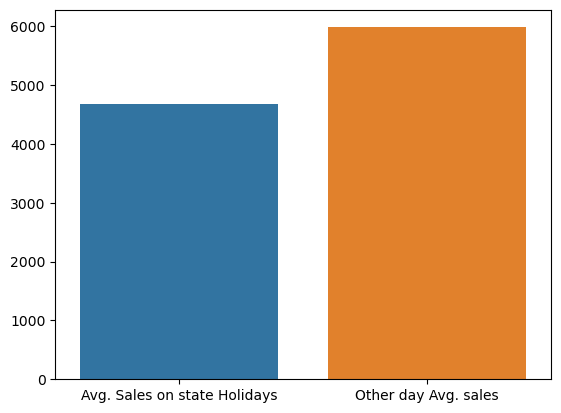

In [23]:
# Check Holodays date
y1, y2 = train_data[train_data['StateHoliday'] != '0'].Sales.mean(), train_data[train_data['StateHoliday'] == '0'].Sales.mean()
sns.barplot(y = [y1, y2], x = ['Avg. Sales on state Holidays', 'Other day Avg. sales'])
plt.title = "Promo Distribution on train dataset"
plt.show()

### The average Sales on State Holidays are less compared to other days (non-holidays)

# Effect of Seasonal (Christmas, Easter) on sales

#### Extract and Adding Day, month and Year columns in the data from Date column

In [26]:
combined_train_store_data.Date = pd.to_datetime(combined_train_store_data.Date)
combined_train_store_data['day'] = combined_train_store_data.Date.dt.day
combined_train_store_data['month'] = combined_train_store_data.Date.dt.month
combined_train_store_data['year'] = combined_train_store_data.Date.dt.year
combined_train_store_data.head(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015


## Sales variation per days, months and years

C:\Users\Suraj\AppData\Local\Temp\ipykernel_33664\1059947625.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  values = combined_train_store_data.groupby(combined_train_store_data.DayOfWeek).mean().Sales


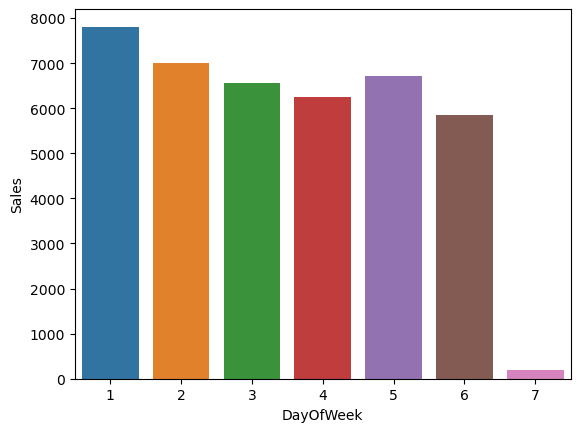

In [28]:
values = combined_train_store_data.groupby(combined_train_store_data.DayOfWeek).mean().Sales
sns.barplot(y = values, x = values.index)
plt.show()

C:\Users\Suraj\AppData\Local\Temp\ipykernel_33664\3303567045.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  values = combined_train_store_data.groupby(combined_train_store_data.day).mean().Sales


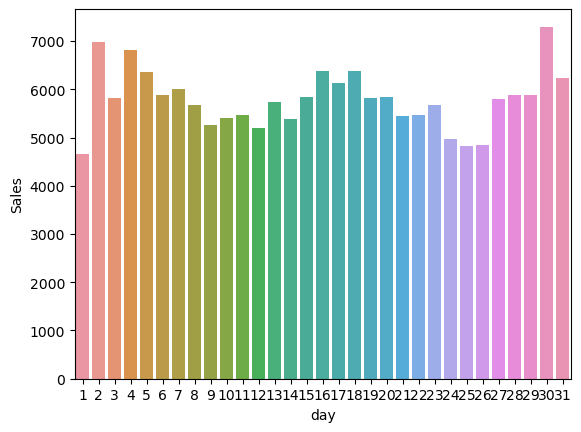

In [29]:
values = combined_train_store_data.groupby(combined_train_store_data.day).mean().Sales
sns.barplot(y = values, x = values.index)
plt.show()

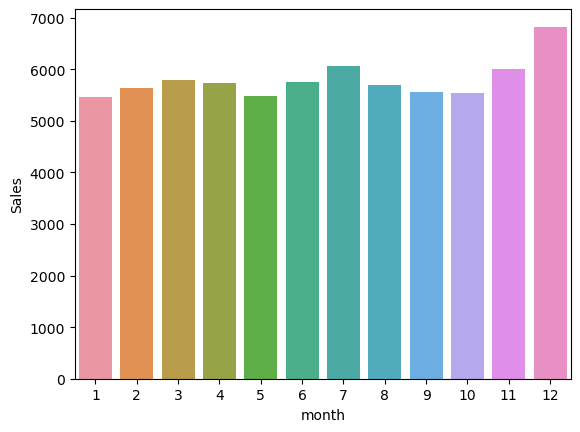

In [30]:
values = combined_train_store_data.groupby(combined_train_store_data.month).Sales.mean()
sns.barplot(y = values, x = values.index)
plt.show()

C:\Users\Suraj\AppData\Local\Temp\ipykernel_33664\3712200705.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  values = combined_train_store_data.groupby(combined_train_store_data.year).mean().Sales


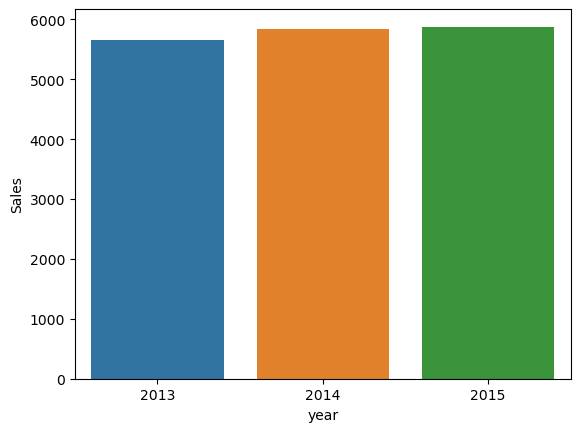

In [31]:
values = combined_train_store_data.groupby(combined_train_store_data.year).mean().Sales
sns.barplot(y = values, x = values.index)
plt.show()

# Results:
Sales vs Week days: On Monday the sales are highest followed by Tuesday, and then are lower on weekends, where on Sunday is lowest (Probably most of the stores are closed)
Sales Vs Month days: Most sales are done at the begining (2-6th days), middle (13-20th days) and at the end (27-30th days) of the month
Sales Vs Months: Most sales are done at the beggining of the year (January to April, with March having most sales), middle of the year (June to August), and at the end of the year (November and December, with December having highest Sales of all the months)
Sales Vs Year: Sales increases as the year increases, from 2013 to 2015

## From the Sales Vs MOnths, it can be seen that, Sales are Higher on Easter (End of March and Begining of April) and Christmas (On December).
Therefore, Sales Increases on Seasons, like Easter and Christmas

## Normalizing Sales and Number of Customers


In [33]:

from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler = MinMaxScaler()

sales_customers_df = pd.DataFrame()
sales_customers_df['Sales'] = combined_train_store_data['Sales']
sales_customers_df['Customers'] = combined_train_store_data['Customers']
try:
    sales_customers_df = scaler.fit_transform(sales_customers_df)
    sales_customers_df = DataFrame(sales_customers_df)
    logging.info(f"Dataset Normalizing successfully")
except Exception as e:
    logging.debug(f"Exception occured in Normalizing the dataset, {e}")

sales_customers_df['days'] = combined_train_store_data['day']
sales_customers_df['Sales'] = sales_customers_df[0]
sales_customers_df['Customers'] = sales_customers_df[1]
try:

    sales_customers_df = sales_customers_df.drop(columns=[0,1])
    logging.info(f"Dropping some columns in dataset successfully")
    
except Exception as e:
    logging.debug(f"Exception occured in dropping some columns in dataset, {e}")

sales_customers_df.sample(3)

,days,Sales,Customers
228522,8,0.098193,0.067407
643553,2,0.243508,0.136979
647256,28,0.135809,0.076475


<Axes: >

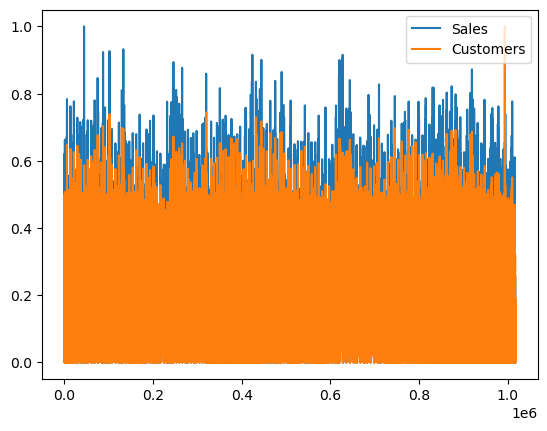

In [34]:
sales_customers_df =sales_customers_df[['Sales','Customers']]
sales_customers_df.plot(kind='line')

#### Sales and Number of Customers are directly proportional as seen in the Figure above

### Effects of promo on sales, and customers

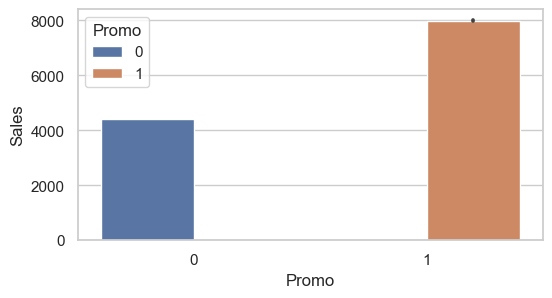

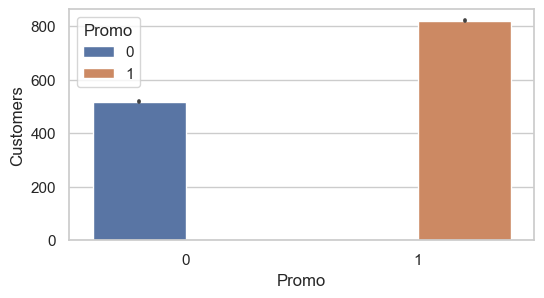

In [37]:
plt.figure(figsize=(6,3))
sns.set(style="whitegrid")
sns.barplot(x='Promo',y='Sales',hue='Promo',data=combined_train_store_data)
plt.show()

plt.figure(figsize=(6,3))
sns.set(style="whitegrid")
sns.barplot(x='Promo',y='Customers',hue='Promo',data=combined_train_store_data)
plt.show()

## Trends of customer behavior during store open and closing times

<Axes: xlabel='DayOfWeek', ylabel='Customers'>

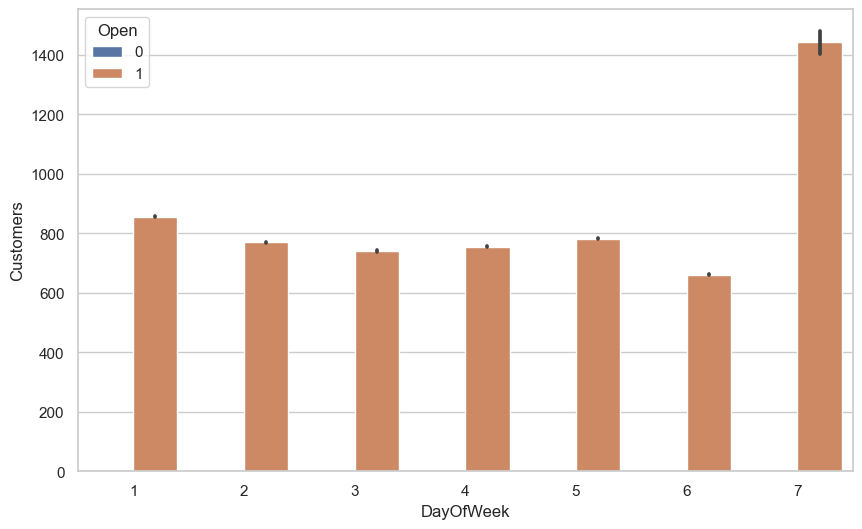

In [38]:

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.barplot(x='DayOfWeek',y='Customers',hue='Open', data=combined_train_store_data)

## Stores which are opened on all weekdays, and How does this affect their sales on weekends.

In [39]:
def store_days_open(dataset, storeType=['a','b','c']):
    for store in storeType:
        try:

            days = dataset[dataset.Open == True][dataset.StoreType == store].DayOfWeek.unique()
            print(f" For StoreType: {store}, the Days of the week that is OPen are: {days}")
            logging.info(f"Getting days of the week where by the store are open, successfully")
            
        except Exception as e:
            logging.debug(f"Exception occured in getting days in which stores are open, {e}")

In [40]:
storeTypes_list = ['a','b', 'c','d']
store_days_open(combined_train_store_data, storeTypes_list)

C:\Users\Suraj\AppData\Local\Temp\ipykernel_33664\2562373114.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  days = dataset[dataset.Open == True][dataset.StoreType == store].DayOfWeek.unique()


 For StoreType: a, the Days of the week that is OPen are: [5 4 3 2 1 7 6]
 For StoreType: b, the Days of the week that is OPen are: [5 4 3 2 1 7 6]
 For StoreType: c, the Days of the week that is OPen are: [5 4 3 2 1 6]
 For StoreType: d, the Days of the week that is OPen are: [5 4 3 2 1 7 6]


### Store Type 'a, b, and d' are open throught the week (weekdays and weekends), while Store Type 'd' is closed in Sunday

### Store Type Sales with respect to Days of the week

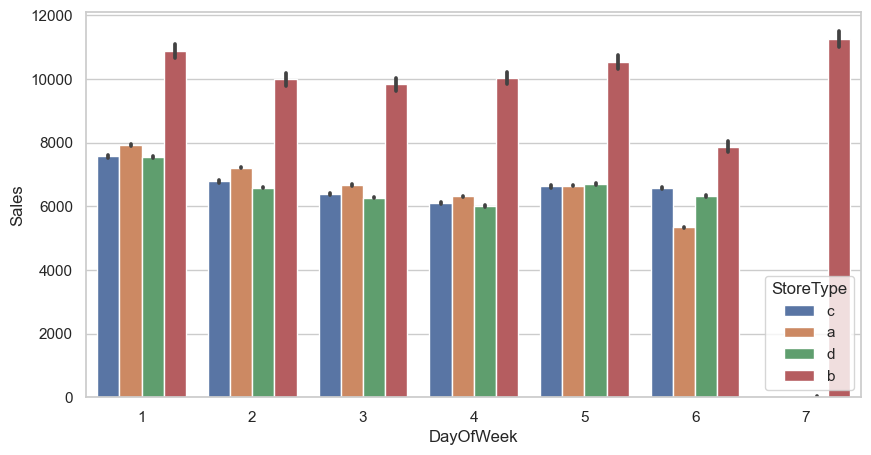

In [41]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x='DayOfWeek',y='Sales',hue='StoreType',data=combined_train_store_data)
plt.show()

Store Types 'a' is Open on all days of the week, and has least sales on Saturday, and almost no sales on sunday,
Store Type 'c' is open on all days of the week, and has almost no sales on sunday,
Store Type 'd' is open from Monday to Saturday, with sales almost constant and on Sunday is closed, and
Store Type 'b' is open on all days of the week, and has almost constant sales during weekdays and less sales on saturday, and highest sales on Sunday.

## How the assortment type affects sales

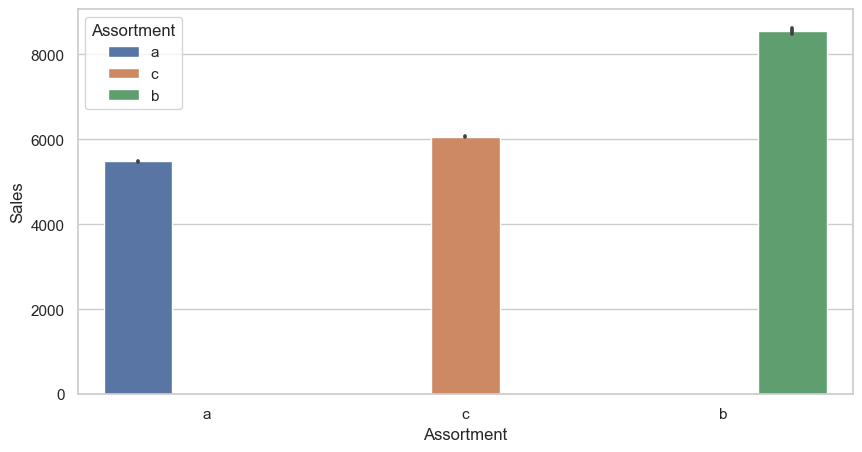

In [43]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x='Assortment',y='Sales',hue='Assortment',data=combined_train_store_data)
plt.show()

# How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [44]:
# Statistical Description of CompetitionDistance
round(combined_train_store_data.CompetitionDistance.describe(),2)

count    1014567.00
mean        5430.09
std         7715.32
min           20.00
25%          710.00
50%         2330.00
75%         6890.00
max        75860.00
Name: CompetitionDistance, dtype: float64

# The minimum, average, and Max. Distance to the Competitor store are 20, 5430 and 75860 distance units respectivelly.

In [45]:
sales = combined_train_store_data[combined_train_store_data.CompetitionDistance <= 710.00].Sales.sum()
sales1 = combined_train_store_data[combined_train_store_data.CompetitionDistance > 710.00][combined_train_store_data.CompetitionDistance <= 2330.00].Sales.sum()
sales2 = combined_train_store_data[combined_train_store_data.CompetitionDistance > 2330.00][combined_train_store_data.CompetitionDistance <= 6890.00].Sales.sum()
sales3 = combined_train_store_data[combined_train_store_data.CompetitionDistance > 6890.00].Sales.sum()

print(sales, sales1, sales2, sales3)

C:\Users\Suraj\AppData\Local\Temp\ipykernel_33664\1937401835.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales1 = combined_train_store_data[combined_train_store_data.CompetitionDistance > 710.00][combined_train_store_data.CompetitionDistance <= 2330.00].Sales.sum()


1556041436 1462736991 1406225904 1436192463


C:\Users\Suraj\AppData\Local\Temp\ipykernel_33664\1937401835.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales2 = combined_train_store_data[combined_train_store_data.CompetitionDistance > 2330.00][combined_train_store_data.CompetitionDistance <= 6890.00].Sales.sum()


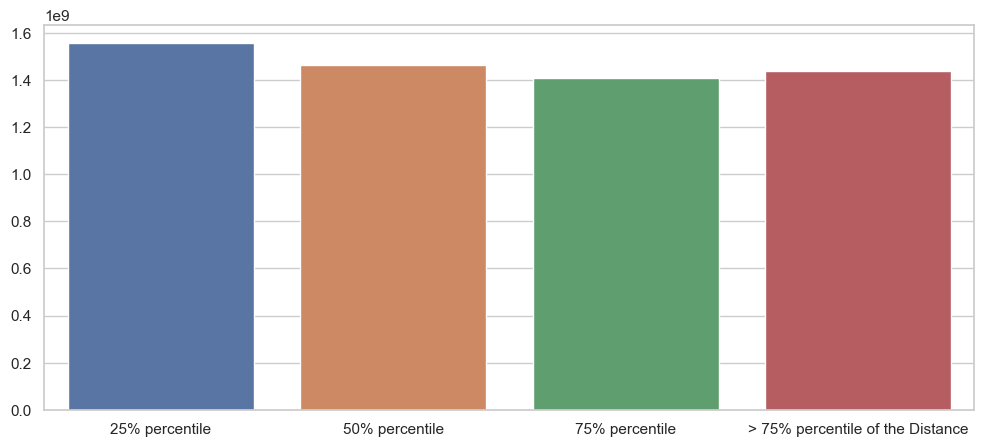

In [46]:
sales_distance = [1556041436, 1462736991, 1406225904, 1436192463]
slaes_names = ['25% percentile','50% percentile','75% percentile', '> 75% percentile of the Distance' ]
plt.figure(figsize=(12,5))
sns.set(style="whitegrid")
sns.barplot(y=sales_distance, x=slaes_names)
plt.show()

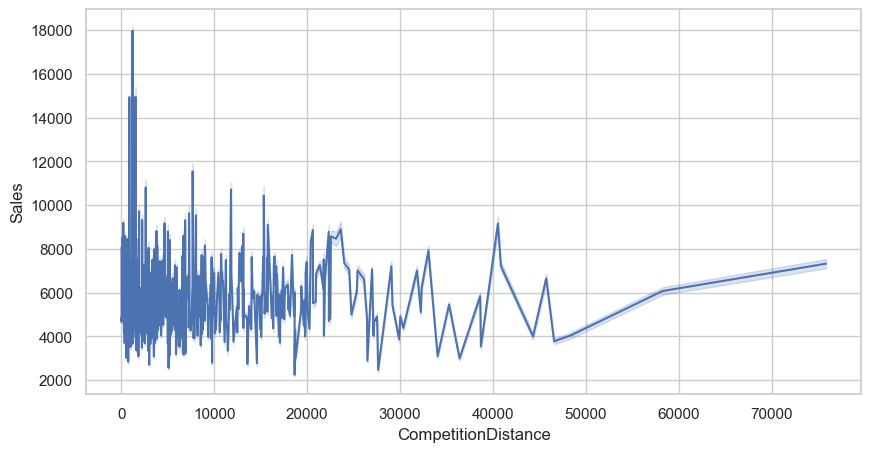

In [47]:
# CompetitionDistance
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.lineplot(x='CompetitionDistance',y='Sales',data=combined_train_store_data)
plt.show()

## From the above graphs (2 graphs above), the Competitor distance slightly affect the Sales inversely, that is, when the distance increases, the sales slightly decreases.